In [3]:
import sys
import operator
import requests
import json
import twitter
import datetime
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
%matplotlib inline
from sqlalchemy import create_engine
my_conn = create_engine("mysql+pymysql://root:""@localhost:3306/test")

In [4]:
import tweepy
import time
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [5]:
consumer_key = 'Your api Key'
consumer_secret = 'Your Consumer Secaret'
access_token = 'your access token'
access_secret = 'your  secret'
bearer_token = 'your bearer token'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)


In [7]:
num_tweets = 100
tweets = []
likes = []
time = []
retweets = []

In [8]:
today = datetime.datetime.now()
today = today.replace(hour=23, minute=59, second=59, microsecond=999999) # set from the beggining of the day
time_to_the_past = 7 # 7 because we want a week before today
week = today - datetime.timedelta(time_to_the_past) 
next_day = week + datetime.timedelta(time_to_the_past) 

In [10]:
for t in tweepy.Cursor (api.search_tweets,
                        q= "Mcdonalds hate-filter:retweets",
                        result_type = ['popular'],
                        lang = 'en',
                        #until = next_day.date(),
                        tweet_mode='extended').items(num_tweets):
    tweets.append(t.full_text)
    likes.append(t.favorite_count)
    time.append(t.created_at)
    retweets.append(t.retweet_count)
    #vs = analyzer.polarity_scores(tweets)
    #scores.append(vs)
    #print("{:-<65} {}".format(tweet, str(vs)))

In [11]:
#for t in tweepy.Cursor (api.search_tweets, q= "Mcdonalds -filter:retweets", result_type = ['popular'], lang = 'en',tweet_mode='extended').items(num_tweets):
    tweets.append(t.full_text)
    likes.append(t.favorite_count)
    time.append(t.created_at)
    retweets.append(t.retweet_count)
    #vs = analyzer.polarity_scores(tweets)
    #scores.append(vs)
    #print("{:-<65} {}".format(tweet, str(vs)))

IndentationError: unexpected indent (<ipython-input-11-ea6c2fe31b58>, line 2)

In [17]:
df = pd.DataFrame({'tweets':tweets, 'likes':likes,'retweets':retweets, 'time':time})

In [18]:
df.sort_values("likes",ascending=False)

,tweets,likes,retweets,time
169,I hate McDonalds to death (gross af food) but ...,37,3,2022-04-27 19:19:03+00:00
69,I hate McDonalds to death (gross af food) but ...,37,3,2022-04-27 19:19:03+00:00
94,@ChilliePillie @BubbaWallace @McDonalds @23XIR...,16,1,2022-04-27 02:34:12+00:00
194,@ChilliePillie @BubbaWallace @McDonalds @23XIR...,16,1,2022-04-27 02:34:12+00:00
123,"modernity was invented in 2001, when mcdonalds...",14,3,2022-04-28 14:32:51+00:00
...,...,...,...,...
64,@storyop2s it's actually mustard! i usually HA...,0,0,2022-04-27 21:02:00+00:00
63,@freezedeeznuts i like tiny pickles bc the big...,0,0,2022-04-27 21:24:31+00:00
62,If I said it once I’ll say it again!!! I Hate ...,0,0,2022-04-27 21:34:59+00:00
61,"@400kDAMAGE we hate to make you wait, Jamie. t...",0,0,2022-04-27 21:56:23+00:00


In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = []
for tweet in tweets:
    vs = analyzer.polarity_scores(tweet)
    scores.append(vs)
    print("{:-<65} {}".format(tweet, str(vs)))
    if vs['compound'] >= 0.05 :
        print("Positive".format(tweet,str(vs)))
    elif vs['compound'] <= - 0.05 :
        print("Negative".format(tweet,str(vs)))
    else :
        print("Neutral".format(tweet,str(vs)))
    

@jerr33333 @FoxNews There's not an episode where she doesn't claim someone or something is racist. She's uses "white people" through out her shows, as she plays victim to everything. Her hate resonates, it's blatantly obvious. She's spiteful, has zero talent and should be stacking cups at McDonalds. {'neg': 0.217, 'neu': 0.701, 'pos': 0.082, 'compound': -0.836}
Negative
i hate when ppl try nd act hard like dawg you work at mcdonalds 😭 {'neg': 0.346, 'neu': 0.549, 'pos': 0.105, 'compound': -0.6908}
Negative
I don't know if that many MAGAts are that interested in Twitter. When they have gun clubs, christian clubs, hate clubs, McDonalds, car shows, Hooters, Chuck E. Cheese, pool halls, bars, etc. in which to share their "political/watched it on Fox" ideas. https://t.co/cyZtdZtxHz {'neg': 0.122, 'neu': 0.78, 'pos': 0.098, 'compound': -0.296}
Negative
In your lifetime how many times has McDonalds raised the price of a Big Mac...?
In your lifetime how many times has McDonalds lowered the pri

In [39]:
#if it is positve negative or neutral
final_dataset['sentiment'] = ' '

for x in range(100):
    if final_dataset.iloc[x,7] < 0:
        final_dataset.iloc[x,8] = 'negative'
    elif final_dataset.iloc[x,7] > 0:
        final_dataset.iloc[x,8] = 'positve'
    else:
        final_dataset.iloc[x,8] = 'neutral'
        
final_dataset

,tweets,likes,retweets,time,neg,neu,pos,compound,Sentiment,sentiment
0,@jerr33333 @FoxNews There's not an episode whe...,0,0,2022-04-29 01:14:04+00:00,0.217,0.701,0.082,-0.8360,negative,
1,i hate when ppl try nd act hard like dawg you ...,1,0,2022-04-29 00:20:55+00:00,0.346,0.549,0.105,-0.6908,negative,
2,I don't know if that many MAGAts are that inte...,4,2,2022-04-28 23:14:16+00:00,0.122,0.780,0.098,-0.2960,negative,
3,In your lifetime how many times has McDonalds ...,4,1,2022-04-28 22:32:59+00:00,0.206,0.794,0.000,-0.9034,negative,
4,i hate carving McDonalds… cause lord knows ima...,1,0,2022-04-28 22:26:02+00:00,0.252,0.748,0.000,-0.5719,negative,
...,...,...,...,...,...,...,...,...,...,...
195,@RondelleCollie we hate to make you feel that ...,0,0,2022-04-27 02:23:47+00:00,0.192,0.673,0.135,-0.2942,negative,
196,I hate that Ailah loves happy meals from McDon...,0,0,2022-04-27 00:30:59+00:00,0.218,0.554,0.228,0.0790,positive,
197,"Wendy’s and Chick fil a are my babies,actually...",0,0,2022-04-26 23:41:02+00:00,0.132,0.768,0.100,-0.5893,negative,
198,just got called a virgin in the @McDonalds dri...,3,1,2022-04-26 22:49:38+00:00,0.254,0.746,0.000,-0.6633,negative,


In [20]:
#data = pd.DataFrame(tweets, columns= ['Tweets'])
data = pd.DataFrame(scores)
final_dataset= pd.concat([df,data], axis=1)

In [40]:
#if it is positve negative or neutral
final_dataset['sentiment'] = ' '

for x in range(100):
    if final_dataset.iloc[x,7] < 0:
        final_dataset.iloc[x,8] = 'negative'
    elif final_dataset.iloc[x,7] > 0:
        final_dataset.iloc[x,8] = 'positve'
    else:
        final_dataset.iloc[x,8] = 'neutral'
        
final_dataset

,tweets,likes,retweets,time,neg,neu,pos,compound,Sentiment,sentiment
0,@jerr33333 @FoxNews There's not an episode whe...,0,0,2022-04-29 01:14:04+00:00,0.217,0.701,0.082,-0.8360,negative,
1,i hate when ppl try nd act hard like dawg you ...,1,0,2022-04-29 00:20:55+00:00,0.346,0.549,0.105,-0.6908,negative,
2,I don't know if that many MAGAts are that inte...,4,2,2022-04-28 23:14:16+00:00,0.122,0.780,0.098,-0.2960,negative,
3,In your lifetime how many times has McDonalds ...,4,1,2022-04-28 22:32:59+00:00,0.206,0.794,0.000,-0.9034,negative,
4,i hate carving McDonalds… cause lord knows ima...,1,0,2022-04-28 22:26:02+00:00,0.252,0.748,0.000,-0.5719,negative,
...,...,...,...,...,...,...,...,...,...,...
195,@RondelleCollie we hate to make you feel that ...,0,0,2022-04-27 02:23:47+00:00,0.192,0.673,0.135,-0.2942,negative,
196,I hate that Ailah loves happy meals from McDon...,0,0,2022-04-27 00:30:59+00:00,0.218,0.554,0.228,0.0790,positive,
197,"Wendy’s and Chick fil a are my babies,actually...",0,0,2022-04-26 23:41:02+00:00,0.132,0.768,0.100,-0.5893,negative,
198,just got called a virgin in the @McDonalds dri...,3,1,2022-04-26 22:49:38+00:00,0.254,0.746,0.000,-0.6633,negative,


In [21]:
final_dataset= final_dataset[~final_dataset.tweets.str.contains("RT")]

In [41]:
final_dataset.sort_values("likes",ascending=False)

#-.05

,tweets,likes,retweets,time,neg,neu,pos,compound,Sentiment,sentiment
69,I hate McDonalds to death (gross af food) but ...,37,3,2022-04-27 19:19:03+00:00,0.471,0.529,0.000,-0.9343,negative,
169,I hate McDonalds to death (gross af food) but ...,37,3,2022-04-27 19:19:03+00:00,0.471,0.529,0.000,-0.9343,negative,
194,@ChilliePillie @BubbaWallace @McDonalds @23XIR...,16,1,2022-04-27 02:34:12+00:00,0.183,0.780,0.037,-0.7964,negative,
94,@ChilliePillie @BubbaWallace @McDonalds @23XIR...,16,1,2022-04-27 02:34:12+00:00,0.183,0.780,0.037,-0.7964,negative,
123,"modernity was invented in 2001, when mcdonalds...",14,3,2022-04-28 14:32:51+00:00,0.213,0.646,0.141,-0.2263,negative,
...,...,...,...,...,...,...,...,...,...,...
64,@storyop2s it's actually mustard! i usually HA...,0,0,2022-04-27 21:02:00+00:00,0.118,0.759,0.123,0.0857,positve,
63,@freezedeeznuts i like tiny pickles bc the big...,0,0,2022-04-27 21:24:31+00:00,0.103,0.669,0.228,0.5423,positve,
62,If I said it once I’ll say it again!!! I Hate ...,0,0,2022-04-27 21:34:59+00:00,0.203,0.797,0.000,-0.6784,negative,
61,"@400kDAMAGE we hate to make you wait, Jamie. t...",0,0,2022-04-27 21:56:23+00:00,0.209,0.791,0.000,-0.5719,negative,


In [42]:
df =pd.DataFrame(final_dataset)

conditions=[
    (df['compound']==0),
    (df['compound']>0),
    (df['compound']<0),
]
values=["neutral",'positive','negative']
#creates a list connected to the conditions indicated above to either neutral, postive or negative
df["Sentiment"]=np.select(conditions,values) 
df.head()

,tweets,likes,retweets,time,neg,neu,pos,compound,Sentiment,sentiment
0,@jerr33333 @FoxNews There's not an episode whe...,0,0,2022-04-29 01:14:04+00:00,0.217,0.701,0.082,-0.8360,negative,
1,i hate when ppl try nd act hard like dawg you ...,1,0,2022-04-29 00:20:55+00:00,0.346,0.549,0.105,-0.6908,negative,
2,I don't know if that many MAGAts are that inte...,4,2,2022-04-28 23:14:16+00:00,0.122,0.780,0.098,-0.2960,negative,
3,In your lifetime how many times has McDonalds ...,4,1,2022-04-28 22:32:59+00:00,0.206,0.794,0.000,-0.9034,negative,
4,i hate carving McDonalds… cause lord knows ima...,1,0,2022-04-28 22:26:02+00:00,0.252,0.748,0.000,-0.5719,negative,


In [24]:
final_dataset.to_sql(con=my_conn,name='mcdonalds',if_exists='replace',index=False)

In [25]:
nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))

additional_stopwords = ['things', 'stuff', 'sure', 'make', 'think','mcdonalds','mcdonald','hate',"https","co","@"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaisakh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
for w in additional_stopwords:

  stop_words.add(w)

import gensim

from gensim.utils import simple_preprocess

In [27]:
word_counts = dict()

for tweet in final_dataset[["tweets", "compound"]].values:

  for token in simple_preprocess(tweet[0]):

    if token not in stop_words:

      if token not in word_counts:

        word_counts[token] = [1, [tweet[1]]]

      else:

        word_counts[token][0] += 1

        word_counts[token][1].append(tweet[1])

In [28]:


for k, v in word_counts.items():

  word_counts[k][1] = np.mean(v[1])

In [29]:
sentiment_df = pd.DataFrame.from_dict(word_counts).transpose().rename({0:'Count', 1:'Sentiment'}, axis=1)

In [30]:
sentiment_df.reset_index(inplace=True)

In [31]:
sentiment_df.rename({'index':'Topic'},axis=1, inplace=True)

In [32]:
Y=sentiment_df.sort_values("Count",ascending=False)

In [37]:
X=Y.head(10).sort_values("Count",ascending=True).reset_index(drop=True)


In [74]:
Y.iloc[0,0]

'reason'

Positive


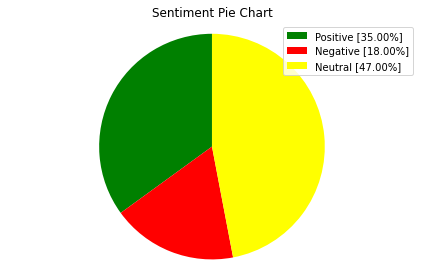

In [30]:
from textblob import TextBlob
import matplotlib.pyplot as plt

def percentage(part,whole):
    return 100*float(part)/float(whole)


positive = 0
negative = 0
neutral = 0
polarity = 0


for tweet in tweets:
    analyzer = TextBlob(tweet)
    polarity += analyzer.sentiment.polarity
    if analyzer.sentiment.polarity > 0:
        positive += 1
    elif analyzer.sentiment.polarity < 0:
        negative += 1
    elif analyzer.sentiment.polarity == 0:
        neutral += 1

positive = percentage(positive,(positive + negative + neutral))
negative = percentage(negative,(positive + negative + neutral))
neutral = percentage(neutral,(positive + negative + neutral))

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

if (polarity > 0):
    print("Positive")
elif (polarity < 0):
    print("Negative")
elif (polarity == 0):
    print("Neutral")

labels = ['Positive ['+str(positive)+'%]', 'Negative ['+str(negative)+'%]', 
'Neutral ['+str(neutral)+'%]']
sizes = [positive, negative, neutral]
colors = ['green','red','yellow']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Sentiment Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [44]:
newdata = pd.DataFrame(polarity)

ValueError: DataFrame constructor not properly called!

In [45]:
plt.bar("Topic", "Count", data =df_first_10 , color = "blue")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.title("Word count")
plt.show()

NameError: name 'df_first_10' is not defined

In [46]:
df_first_10.sort

NameError: name 'df_first_10' is not defined

In [47]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,20)

In [48]:
plt.bar("Topic", "Count", data =df_first_10, color = "blue")
plt.xlabel("Topic")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Word Count")
plt.show()

NameError: name 'df_first_10' is not defined

<AxesSubplot:xlabel='Topic'>

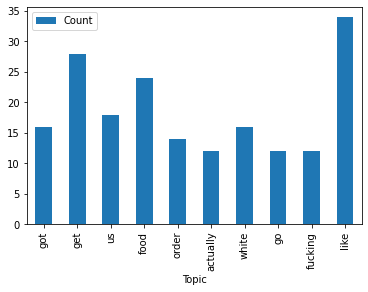

In [38]:
X.plot(x = 'Topic', y = 'Count', kind = 'bar')

In [ ]:
#final_dataset= final_dataset[~final_dataset.tweets.str.contains("RT")]

In [50]:
final_dataset.sort_values("likes",ascending=False)


,tweets,likes,retweets,time,neg,neu,pos,compound
60,@mcdonalds was one of the 2 finalists in the “...,20,2,2022-04-26 02:18:42+00:00,0.115,0.669,0.216,0.8074
91,Is there a reason McDonalds no longer serves t...,12,1,2022-04-25 15:59:28+00:00,0.288,0.712,0.000,-0.7820
17,@ChilliePillie @BubbaWallace @McDonalds @23XIR...,12,1,2022-04-27 02:34:12+00:00,0.183,0.780,0.037,-0.7964
14,vanilla or chocolate? — chocolate! though i've...,9,0,2022-04-27 04:26:35+00:00,0.121,0.879,0.000,-0.6452
82,"I love mcdonalds, I hate mcdonalds, I am chemi...",8,0,2022-04-25 18:35:03+00:00,0.084,0.820,0.096,0.1280
...,...,...,...,...,...,...,...,...
1,Mcdonalds you either hate hate love hate hate ...,0,0,2022-04-27 14:36:50+00:00,0.342,0.582,0.076,-0.7992
54,"MOM CAN WE GO TO MCDONALDS?? :D ""No Kuzu we ha...",0,0,2022-04-26 05:50:12+00:00,0.189,0.681,0.131,-0.4188
56,@ChaseOzment @elonmusk Just because you make 1...,0,0,2022-04-26 03:29:32+00:00,0.132,0.809,0.059,-0.6124
57,@MDFolatti Just because you make 15k a year by...,0,0,2022-04-26 03:28:53+00:00,0.135,0.805,0.060,-0.6124


In [56]:
Text = final_dataset.iloc[0,0] 
for x in range(1,100):
    Text = Text + " " +  final_dataset.iloc[x,0]

In [71]:
for char in '-.,\n@ hate':
    Text=Text.replace(char,' ')
Text = Text.lower()
# split returns a list of words delimited by sequences of whitespace (including tabs, newlines, etc, like re's \s) 
word_list = Text.split()


In [72]:
d = {};

In [73]:
for key in word_list: 
    d[key] = d.get(key, 0) + 1


In [74]:
sorted(d.items(), key = lambda x: x[1], reverse = True)

[('r', 225),
 ('s', 204),
 ('i', 170),
 ('w', 148),
 ('n', 137),
 ('m', 129),
 ('d', 110),
 ('y', 100),
 ('mcdon', 99),
 ('c', 99),
 ('o', 95),
 ('lds', 93),
 ('v', 78),
 ('b', 76),
 ('is', 70),
 ('nd', 61),
 ('you', 57),
 ('p', 54),
 ('l', 47),
 ('k', 47),
 ('f', 39),
 ('g', 38),
 ('no', 34),
 ('ll', 33),
 ('in', 32),
 ('us', 30),
 ('li', 28),
 ('on', 28),
 ('j', 28),
 ('ing', 26),
 ('for', 25),
 ('rs', 23),
 ('jus', 22),
 ('ss', 22),
 ('son', 22),
 ('of', 19),
 ('lly', 18),
 ('bu', 18),
 ('ps://', 18),
 ('im', 17),
 ('do', 17),
 ('ir', 17),
 ('my', 16),
 ('lik', 16),
 ('wi', 15),
 ('go', 15),
 ('opl', 15),
 ('ny', 15),
 ('so', 14),
 ('bl', 14),
 (':', 14),
 ('ry', 14),
 ('som', 13),
 ('ns', 13),
 ('rk', 12),
 ('los', 12),
 ('mm', 11),
 ('from', 11),
 ('or', 11),
 ('om', 11),
 ('’s', 11),
 ('sl', 11),
 ('sid', 11),
 ('z', 11),
 ('your', 10),
 ('ic', 10),
 ('lov', 10),
 ('food', 10),
 ('ly', 10),
 ('if', 10),
 ('ros', 10),
 ('mod', 10),
 ('_g', 10),
 ('fu', 10),
 ('ood', 10),
 ('ys', 9

In [80]:
final_dataset.to_sql(con=my_conn,name='mcdonalds',if_exists='replace',index=False)

In [281]:
db_connection_str = "mysql+pymysql://root:""@localhost:3307/test"
db_connection = create_engine(db_connection_str)

In [282]:
new_df = pd.read_sql('SELECT * FROM test', con=db_connection)

In [283]:
new_df.sort_values("likes" ,ascending=False)

,tweets,likes,retweets,time,neg,neu,pos,compound
10,"It’s 8:41 in the AM, I’ve burned my ear on my ...",109,3,2022-04-12 13:41:51,0.000,0.934,0.066,0.4939
18,We fetched my nephew from school.\n\nHim: “kok...,88,5,2022-04-12 12:56:34,0.345,0.541,0.114,-0.9260
6,since burger king gives you the cardboard crow...,60,8,2022-04-12 13:54:20,0.062,0.813,0.125,0.3182
22,would you like fries with that sappy meal? \n\...,32,1,2022-04-12 12:19:49,0.129,0.710,0.161,0.1280
7,BREAKING NEWS: Donald Trump is threatening to ...,26,7,2022-04-12 13:52:18,0.152,0.775,0.072,-0.4588
4,The taggers in Seattle take advantage of vacan...,19,1,2022-04-12 14:19:19,0.000,0.920,0.080,0.2500
20,14/ He stumbled upon PICS in 2019 &amp; everyt...,19,2,2022-04-12 12:34:42,0.037,0.879,0.084,0.3595
17,"Together with our customers and franchisees, w...",9,3,2022-04-12 13:01:30,0.000,0.818,0.182,0.8096
11,Join us tomorrow for #Oracle Live! #HR leaders...,9,4,2022-04-12 13:30:01,0.000,0.767,0.233,0.7959
14,@Borarmy8 @astrogyrll yes as a 2020 army I rem...,9,1,2022-04-12 13:16:59,0.000,0.854,0.146,0.3818


In [311]:
final_dataset.to_csv("new_twitter1.csv")

In [285]:
new_df

,tweets,likes,retweets,time,neg,neu,pos,compound
0,We’re getting ready for Easter here at Bredbur...,1,1,2022-04-12 14:44:01,0.000,0.872,0.128,0.3612
1,Please join us at participating @McDonalds on ...,5,2,2022-04-12 14:40:04,0.060,0.771,0.169,0.5423
2,THE BACON POTATO PIE IS BACK AT MCDONALDS\n\nS...,2,2,2022-04-12 14:36:13,0.000,0.768,0.232,0.8709
3,I saw a woman from Mcdonalds pull her mask dow...,5,1,2022-04-12 14:20:26,0.000,0.772,0.228,0.6808
4,The taggers in Seattle take advantage of vacan...,19,1,2022-04-12 14:19:19,0.000,0.920,0.080,0.2500
5,Matthew Perry spotted on a McDonald’s run with...,1,1,2022-04-12 14:07:03,0.000,0.928,0.072,0.3612
6,since burger king gives you the cardboard crow...,60,8,2022-04-12 13:54:20,0.062,0.813,0.125,0.3182
7,BREAKING NEWS: Donald Trump is threatening to ...,26,7,2022-04-12 13:52:18,0.152,0.775,0.072,-0.4588
8,@Mike_Haracz @MarkusKirkpatr2 @j_bryan_ This!?...,5,1,2022-04-12 13:43:52,0.172,0.828,0.000,-0.6103
9,fuck @mcdonalds what kinda shit is this https:...,2,1,2022-04-12 13:43:23,0.532,0.468,0.000,-0.7787


In [199]:
#new_df.sort_values("likes",ascending=False)

,tweets,likes,retweets,time,neg,neu,pos,compound
498,@Dream i made this but don’t show brian from l...,300,7,2022-04-11 23:22:31,0.000,0.766,0.234,0.1901
110,visited the mcdonalds i went to as a kid today...,173,32,2022-04-07 17:15:04,0.153,0.789,0.057,-0.6940
86,Youtube Chef: Don't you just hate McDonalds fr...,142,16,2022-04-08 15:21:50,0.075,0.774,0.151,0.4867
105,It’s never my first choice but it’s hilarious ...,47,3,2022-04-07 21:03:54,0.314,0.519,0.167,-0.4767
63,A powerful argument against all those who beli...,36,1,2022-04-09 04:44:11,0.112,0.811,0.077,-0.4404
...,...,...,...,...,...,...,...,...
306,@mitchsbff MCDONALDS,0,0,2022-04-12 00:02:55,0.000,1.000,0.000,0.0000
304,@McDonalds why are my nuggies hard ?,0,0,2022-04-12 00:03:04,0.167,0.833,0.000,-0.1027
303,@TeammateTyler we're concerned about your heal...,0,0,2022-04-12 00:03:14,0.000,0.739,0.261,0.6476
302,@McDonalds @Dream Nice fanart?,0,0,2022-04-12 00:03:27,0.000,0.155,0.845,0.8730


In [195]:
#new_df.sort_values("likes",ascending=False)

,tweets,likes,retweets,time,neg,neu,pos,compound
498,@Dream i made this but don’t show brian from l...,300,7,2022-04-11 23:22:31,0.000,0.766,0.234,0.1901
110,visited the mcdonalds i went to as a kid today...,173,32,2022-04-07 17:15:04,0.153,0.789,0.057,-0.6940
86,Youtube Chef: Don't you just hate McDonalds fr...,142,16,2022-04-08 15:21:50,0.075,0.774,0.151,0.4867
105,It’s never my first choice but it’s hilarious ...,47,3,2022-04-07 21:03:54,0.314,0.519,0.167,-0.4767
63,A powerful argument against all those who beli...,36,1,2022-04-09 04:44:11,0.112,0.811,0.077,-0.4404
...,...,...,...,...,...,...,...,...
306,@mitchsbff MCDONALDS,0,0,2022-04-12 00:02:55,0.000,1.000,0.000,0.0000
304,@McDonalds why are my nuggies hard ?,0,0,2022-04-12 00:03:04,0.167,0.833,0.000,-0.1027
303,@TeammateTyler we're concerned about your heal...,0,0,2022-04-12 00:03:14,0.000,0.739,0.261,0.6476
302,@McDonalds @Dream Nice fanart?,0,0,2022-04-12 00:03:27,0.000,0.155,0.845,0.8730
